## Лабораторная работа №3

## Решающие деревья

### Импорты

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as plot

In [6]:
import warnings

warnings.filterwarnings('ignore')

### Загрузка данных

In [7]:
data = {'Neo': pd.read_csv('result_neo.csv'), 'Mumbai': pd.read_csv('result_mumbai.csv')}
data['Neo'] = data['Neo'].drop(columns=['name'])
data['Neo'].head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.016016,0.035813,56014.080,1024333.0,26.09,0
1,0.030518,0.068240,7864.348,32681860.0,24.70,0
2,0.055533,0.124177,55257.543,65386360.0,23.41,0
3,0.019256,0.043057,41531.406,12607958.0,25.70,0
4,0.139494,0.311918,67639.390,71305896.0,21.41,0


In [8]:
data['Mumbai'].head()

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,ready_to_move,new_housing,parking,lift,flat_or_individual,furnished_status_Semi-Furnished,furnished_status_Unfurnished
0,22.4,629,19.032800,72.896357,2,2,0,0,1,0,0,1,0,1
1,35.0,974,19.032800,72.896357,3,2,0,0,1,0,0,1,0,1
2,31.7,968,19.085600,72.909277,3,3,0,0,1,0,0,1,0,1
3,18.7,629,19.155756,72.846862,2,2,2,1,1,2,2,1,0,1
4,13.5,1090,19.177555,72.849887,2,2,0,1,1,0,0,1,0,1


### Выделим целевой признак и предикторы 

In [9]:
Y_mumbai = data['Mumbai']['price']
Y_neo = data['Neo']['hazardous']
X_mumbai = data['Mumbai'].drop(columns= ['price'])
X_neo = data['Neo'].drop(columns=['hazardous'])

### Баланс классов

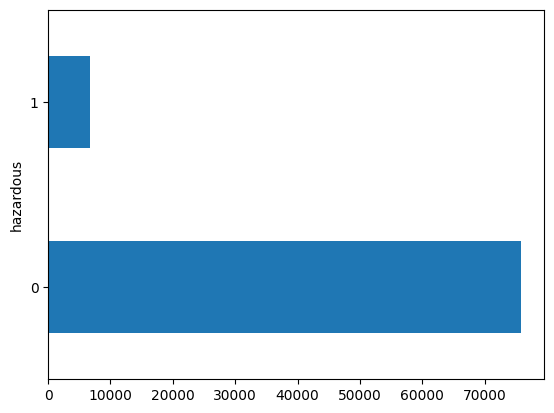

In [10]:
Y_neo.value_counts().plot.barh();

In [11]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy={1:35000})

transformed_X_neo_over , transformed_Y_neo_over = oversample.fit_resample(X_neo, Y_neo)

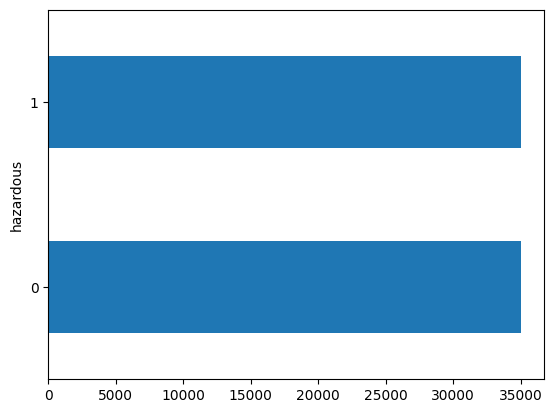

In [12]:
from imblearn.under_sampling import RandomUnderSampler

undersampling = RandomUnderSampler(replacement=True)

transformed_X_neo, transformed_Y_neo = undersampling.fit_resample(transformed_X_neo_over, transformed_Y_neo_over)


transformed_Y_neo.value_counts().plot.barh();

### Разделение данных на обучающую и тестовую выборки

**k-fold**

In [17]:
from sklearn.model_selection import cross_val_score, train_test_split

def k_fold(model, X_train, y_train, scoring = 'accuracy', print_result = True):
    scores  = cross_val_score(model, X_train,y_train, cv = 5, scoring=scoring)
    if print_result:
        print("Оценки кросс-валидации на обучающем наборе", scores)
        print("Средняя оценка кросс-валидации на обучающем наборе", np.mean(scores))
    return np.mean(scores)

**hold-out**

In [14]:
X_train_neo, X_test_neo, y_train_neo, y_test_neo = train_test_split(transformed_X_neo, transformed_Y_neo,test_size=0.3 )

In [15]:
X_train_mumb, X_test_mumb, y_train_mumb, y_test_mumb = train_test_split(X_mumbai, Y_mumbai, test_size=0.3)

### <span style= "color:rgb(139, 157, 237)">Решающие деревья<span> 

**РЕШЕНИЕ ЗАДАЧИ КЛАССФИКАЦИИ И РЕГРЕССИИ**

#### Импорты

In [3]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier,  StackingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn import tree

In [4]:
from ml_library.metrics import custom_classifier_metrics
from ml_library.metrics_regression import print_error
from ml_library.graphics import plot_roc_curves, print_chart, plot_distplot_regressors

In [14]:
from joblib import dump, load

In [15]:
from ml_library.hyperparams import gridSearchCV_params, randomizedSearchCV_params

#### Модели <span style= "color:rgb(155, 238, 202)"> DecisionTreeClassifier <span>, <span style= "color:rgb(71, 160, 150)">DecisionTreeRegressor<span>

 <span style= "color:rgb(155, 238, 202)"> DecisionTreeClassifier <span>

In [ ]:
optimal_alpha = 

dTC = DecisionTreeClassifier(max_depth=3)
dTC.fit(X_train_neo, y_train_neo)

DecisionTreeClassifier(max_depth=3)

#### Схема дерева

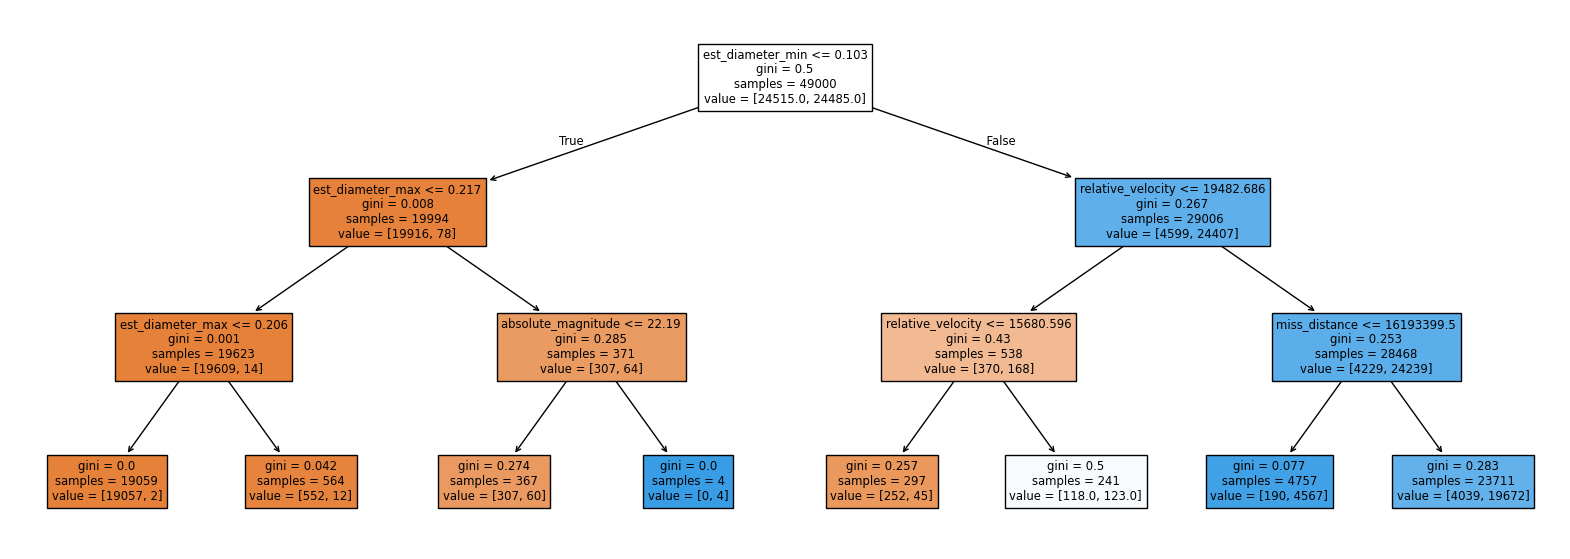

In [44]:
plt.figure(figsize=(20,7))
plot_tree(dTC, feature_names=X_train_neo.columns, filled=True);

In [56]:
dTC = load('DTC_model.joblib')

**МЕТРИКИ** <span style= "color:rgb(155, 238, 202)"> DecisionTreeClassifier <span>

In [17]:
y_predict_dTC = dTC.predict(X_test_neo)
custom_classifier_metrics(y_test_neo, y_predict_dTC)

                 Метрики качества
accuracy_score             0.9089
precision_score            0.8523
recall_score               0.9896
f1_score                   0.9159
Матрица ошибок (Строки: Predicted, Столбцы: True):
------------------
              Class 0     Class 1
-----------------------------------
Predicted  Class 0  |   8675     1804 |
Predicted  Class 1  |    109    10412 |
-----------------------------------


**ПОДБОР ГИПЕРАПАРАМЕТРОВ**

In [ ]:
dTC_params = {
    'max_depth': [3, 5, 7, 11, None],
    'min_samples_split': [2, 5,10,20],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes':[None, 10,20,50]
}

In [46]:
best_dTC = gridSearchCV_params(DecisionTreeClassifier(), dTC_params, X_train_neo, y_train_neo)

 Лучшие параметры для модели (GridSearchCV) 'criterion':'entropy', 'max_depth':'None', 'max_leaf_nodes':'None', 'min_samples_split':'2'


In [48]:
k_fold(best_dTC, X_train_neo, y_train_neo)

Оценки кросс-валидации на обучающем наборе [0.92785714 0.92969388 0.9277551  0.93357143 0.9355102 ]
Средняя оценка кросс-валидации на обучающем наборе 0.930877551020408


In [21]:
y_predict_dTC = best_dTC.predict(X_test_neo)
custom_classifier_metrics(y_test_neo, y_predict_dTC)

                 Метрики качества
accuracy_score             0.9345
precision_score            0.9424
recall_score               0.9259
f1_score                   0.9341
Матрица ошибок (Строки: Predicted, Столбцы: True):
------------------
              Class 0     Class 1
-----------------------------------
Predicted  Class 0  |   9884      595 |
Predicted  Class 1  |    780     9741 |
-----------------------------------


<span style= "color:rgb(71, 160, 150)">DecisionTreeRegressor<span>

In [19]:
dTR_params = {
     'max_depth': [3, 5, 7, 11, None],
    'min_samples_split': [2, 5,10,20],
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_leaf_nodes':[None, 10, 20, 50]
}

In [20]:
dTR = gridSearchCV_params(DecisionTreeRegressor(),dTR_params, X_train_mumb, y_train_mumb)

 Лучшие параметры для модели (GridSearchCV) 'criterion':'absolute_error', 'max_depth':'7', 'max_leaf_nodes':'None', 'min_samples_split':'2'


In [18]:
from joblib import load

dTR = load('DTR_model.joblib')

In [21]:
k_fold(dTR, X_train_mumb, y_train_mumb, scoring='r2')

Оценки кросс-валидации на обучающем наборе [0.41853211 0.75297236 0.66707976 0.64539587 0.43854112]
Средняя оценка кросс-валидации на обучающем наборе 0.5845042458896804


##### Схема дерева

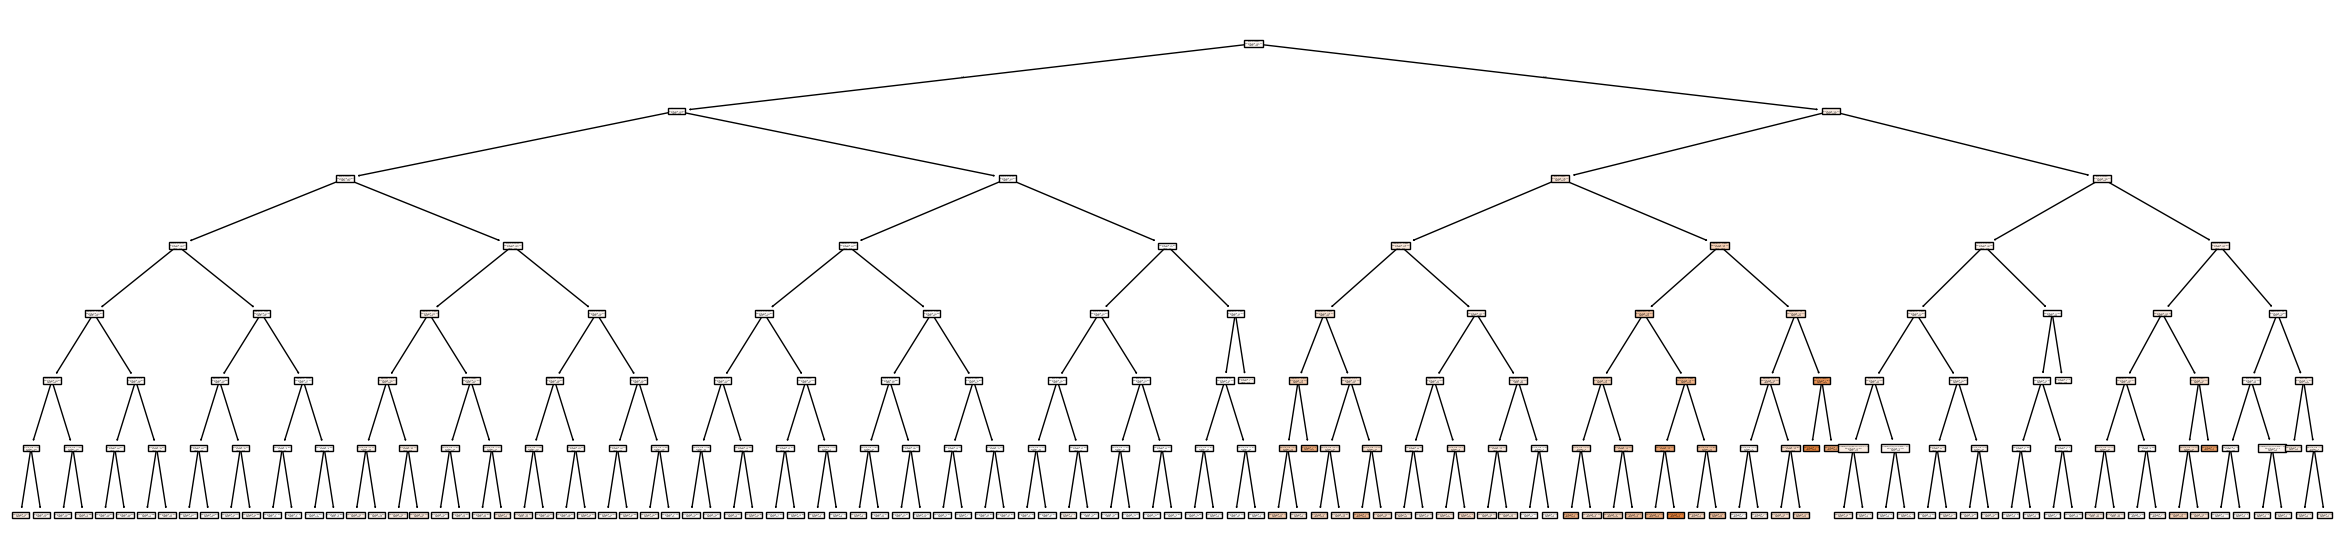

In [58]:
plt.figure(figsize=(30,7))
plot_tree(dTR, feature_names=X_train_mumb.columns, filled=True);

In [25]:
y_pred_dTR = dTR.predict(X_test_mumb)

In [39]:
print_error(y_test_mumb, y_pred_dTR)

               Метрики качества
MAE                     6.99513
MSE                   219.02899
RMSE                   14.79963
MAPE                    0.28978
Adjusted_rand           0.02523
R^2                     0.69555


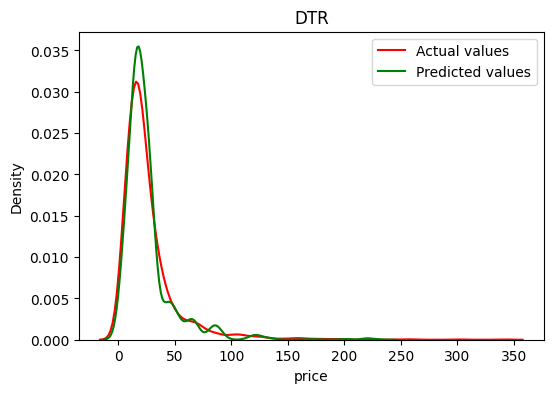

In [27]:
print_chart('DTR', y_test_mumb, y_pred_dTR);

#### Ансамбли <span style= "color:rgb(223, 142, 226)">BaggingRegressor<span> ,  <span style= "color:rgb(236, 184, 90)">BaggingClassifier<span>

<span style= "color:rgb(223, 142, 226)">BaggingRegressor<span>

**ПОДБОР ГИПЕРПАРАМЕТРОВ**

In [28]:
br_params= {
    'n_estimators':[10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'estimator': [dTR, None]
}

In [29]:
BR = randomizedSearchCV_params(BaggingRegressor(), br_params, X_train_mumb, y_train_mumb)

Лучшие параметры для модели (RandomizedSearchCV) 'n_estimators':'100', 'max_samples': 0.5, 'max_features': 1.0, 'estimator':'None', 'bootstrap':'True'


In [22]:
BR = load('BR_model.joblib')

In [23]:
k_fold(BR, X_train_mumb, y_train_mumb, scoring='r2')

Оценки кросс-валидации на обучающем наборе [0.67566139 0.80224617 0.8038571  0.78226747 0.76255996]
Средняя оценка кросс-валидации на обучающем наборе 0.7653184196917511


In [31]:
y_pred_BR = BR.predict(X_test_mumb)

In [32]:
print_error(y_test_mumb, y_pred_BR)

               Метрики качества
MAE                     6.02379
MSE                   147.41283
RMSE                   12.14137
MAPE                    0.25483
Adjusted_rand           0.00009
R^2                     0.79510



 <span style= "color:rgb(236, 184, 90)">BaggingClassifier<span>

**ПОДБОР ГИПЕРПАРАМЕТРОВ**

In [33]:
bc_params = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
}

In [34]:
BC = gridSearchCV_params(BaggingClassifier(), bc_params, X_train_neo, y_train_neo)

 Лучшие параметры для модели (GridSearchCV) 'max_samples': 1.0, 'n_estimators':'100'


In [36]:
y_pred_BC = BC.predict(X_test_neo)

In [37]:
custom_classifier_metrics(y_test_neo, y_pred_BC)

                 Метрики качества
accuracy_score             0.9447
precision_score            0.9421
recall_score               0.9479
f1_score                   0.9450
Матрица ошибок (Строки: Predicted, Столбцы: True):
------------------
              Class 0     Class 1
-----------------------------------
Predicted  Class 0  |   9872      613 |
Predicted  Class 1  |    548     9967 |
-----------------------------------


In [42]:
k_fold(BC, X_train_neo, y_train_neo)

Оценки кросс-валидации на обучающем наборе [0.93938776 0.93897959 0.93530612 0.94081633 0.9427551 ]
Средняя оценка кросс-валидации на обучающем наборе 0.9394489795918368


#### Ансамбли <span style= "color:rgb(113, 95, 183)">GradientBoostingRegressor<span> ,  <span style= "color:rgb(220, 85, 55)">GradientBoostingClassifier<span>

<span style= "color:rgb(113, 95, 183)">GradientBoostingRegressor</span>

**ПОДБОР ГИПЕРПАРАМЕТРОВ**

In [12]:
GBR_params = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01,0.05, 0.1, 0.2],
    'max_depth': [3, 5 ,7],
    'max_features': ['sqrt', 'log2', None]
}

In [51]:
GBR = gridSearchCV_params(GradientBoostingRegressor(), GBR_params, X_train_mumb, y_train_mumb)

 Лучшие параметры для модели (GridSearchCV) 'learning_rate': 0.2, 'max_depth':'5', 'max_features':'None', 'n_estimators':'50'


In [52]:
y_predict_GBR = GBR.predict(X_test_mumb)

In [53]:
print_error(y_test_mumb, y_predict_GBR)

               Метрики качества
MAE                     6.23032
MSE                   171.37565
RMSE                   13.09105
MAPE                    0.25907
Adjusted_rand           0.00083
R^2                     0.76179


<span style= "color:rgb(220, 85, 55)">GradientBoostingClassifier</span>

**ПОДБОР ГИПЕРПАРАМЕТРОВ**

In [ ]:
GBC_params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 7],
    'max_features': ['sqrt', 'log2', None]
}

In [60]:
GBC = randomizedSearchCV_params(GradientBoostingClassifier(), GBC_params, X_train_neo, y_train_neo)

Лучшие параметры для модели (RandomizedSearchCV) 'n_estimators':'300', 'max_features':'sqrt', 'max_depth':'7', 'learning_rate': 0.1


In [63]:
y_predict_GBC = GBC.predict(X_test_neo)

In [64]:
custom_classifier_metrics(y_test_neo, y_predict_GBC)

                 Метрики качества
accuracy_score             0.9409
precision_score            0.9256
recall_score               0.9590
f1_score                   0.9420
Матрица ошибок (Строки: Predicted, Столбцы: True):
------------------
              Class 0     Class 1
-----------------------------------
Predicted  Class 0  |   9675      810 |
Predicted  Class 1  |    431    10084 |
-----------------------------------


#### Ансамбли <span style= "color:rgb(73, 187, 228)">StackingRegressor<span> ,  <span style= "color:rgb(175, 77, 236)">StackingClassifier<span>


<span style= "color:rgb(73, 187, 228)">StackingRegressor<span>

**ПОДБОР ГИПЕРПАРАМЕТРОВ**

In [ ]:
estimators_SR = [
    ('gbr', GradientBoostingRegressor(random_state=42)),
    ('rf', RandomForestRegressor(random_state=42)),
    ('svr', SVR())
]

SR_params = {
    'cv': [3,5],
    'passthrough': [True, False]
}

In [73]:
SR = gridSearchCV_params(StackingRegressor(estimators=estimators_SR, final_estimator=Ridge()), SR_params, X_train_mumb, y_train_mumb)

 Лучшие параметры для модели (GridSearchCV) 'cv':'5', 'passthrough':'True'


In [24]:
SR = load('SR_model.joblib')

In [25]:
k_fold(SR, X_train_mumb, y_train_mumb, 'r2')

Оценки кросс-валидации на обучающем наборе [0.71931575 0.81270271 0.84147997 0.79669932 0.79412252]
Средняя оценка кросс-валидации на обучающем наборе 0.792864055226962


In [32]:
y_predict_SR = SR.predict(X_test_mumb)

In [33]:
print_error(y_test_mumb, y_predict_SR)

               Метрики качества
MAE                     5.02970
MSE                    96.00611
RMSE                    9.79827
MAPE                    0.23048
Adjusted_rand          -0.00002
R^2                     0.87885


 <span style= "color:rgb(175, 77, 236)">StackingClassifier<span>

In [18]:
base_estimators = [
    ('rfc', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()) 
]

SC_params = {
    'cv': [3, 5],
    'passthrough': [True, False]
}

SC_init = StackingClassifier(estimators=base_estimators, cv=5, passthrough=True).fit(X_train_neo, y_train_neo)

In [19]:
dump(SC_init, 'SC_model.joblib')

['SC_model.joblib']

In [20]:
y_predict_SC = SC_init.predict(X_test_neo)
custom_classifier_metrics(y_test_neo, y_predict_SC)

                 Метрики качества
accuracy_score             0.6790
precision_score            0.7005
recall_score               0.6171
f1_score                   0.6562
Матрица ошибок (Строки: Predicted, Столбцы: True):
------------------
              Class 0     Class 1
-----------------------------------
Predicted  Class 0  |   7825     2751 |
Predicted  Class 1  |   3991     6433 |
-----------------------------------


In [21]:
sk_learn_solve = {
    'Classifier': {
        'DTC': load('DTC_model.joblib'),
        'BC': load('BC_model.joblib'),
        'GBC': load('GBC_model.joblib'),
        'SC': load('SC_model.joblib'),
    },

    'Regression': {
        'DTR': load('DTR_model.joblib'),
        'BR': load('BR_model.joblib'),
        'GBR': load('GBR_model.joblib'),
        'SR': load('SR_model.joblib')
    }
}

In [22]:
plot_distplot_regressors(sk_learn_solve['Regression'], X_test_mumb, y_test_mumb, x_title='Price', y_title='Dencity')

In [23]:
plot_roc_curves(sk_learn_solve['Classifier'], X_test_neo, y_test_neo)

**ВЫВОДЫ:**

- Для задачи регрессии лучшие показатели имеют модели ```StackingRegression``` (R2 = 0,89) и ```GradientBoostingRegression``` (R2 = 0,88)

- Для задачи классификации ```BaggingClassifier``` (AUC = 0,99, f1_score = 0,94) и ```GradientBoostingClassifier``` (AUC = 0,99, f1_score = 0,94)

### Решение задачи регрессии и классификации с ипользованием библиотек <span style= "color:rgb(213, 79, 61)">*CatBoost*<span>, <span style= "color:rgb(243, 255, 135)">*XGBoost*<span>, <span style= "color:rgb(203, 236, 236)">*LightGBM*<span>

#### Импорты

In [16]:
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

<span style= "color:rgb(213, 79, 61)"> *CatBoost* </span>/Classifier

**ПОДБОР ГИПЕРПАРАМЕТРОВ**

In [27]:
CBC_params = {
    'iterations': [100,200],
    'depth': [3,5,7],
    'learning_rate': [0.01,0,1],
    'l2_leaf_reg': [1, 3],
}
catBoostClassifier = gridSearchCV_params(CatBoostClassifier(verbose=0, random_seed=42), CBC_params, X_train_neo, y_train_neo)

 Лучшие параметры для модели (GridSearchCV) 'depth':'7', 'iterations':'200', 'l2_leaf_reg':'3', 'learning_rate':'1'


In [28]:
dump(catBoostClassifier, 'CatBoostC_model.joblib')

['CatBoostC_model.joblib']

In [48]:
catBoostClassifier = load('CatBoostC_model.joblib')

In [49]:
y_predict_catBoostC = catBoostClassifier.predict(X_test_neo)
custom_classifier_metrics(y_test_neo, y_predict_catBoostC)

                 Метрики качества
accuracy_score             0.9294
precision_score            0.9220
recall_score               0.9373
f1_score                   0.9296
Матрица ошибок (Строки: Predicted, Столбцы: True):
------------------
              Class 0     Class 1
-----------------------------------
Predicted  Class 0  |   9725      828 |
Predicted  Class 1  |    655     9792 |
-----------------------------------


<span style= "color:rgb(213, 79, 61)"> *CatBoost* </span>/Regressor

In [ ]:
CBR_params = {
    'iterations': [200, 500,],
    'depth': [3,5,7],
    'learning_rate': [0.01,0,1],
    'l2_leaf_reg': [1, 3],
}
CB_Regressor = gridSearchCV_params(CatBoostRegressor(), CBR_params, X_train_mumb, y_train_mumb)

In [19]:
dump(CB_Regressor, 'CatBoostR_model.joblib')

['CatBoostR_model.joblib']

In [20]:
y_predict_CatBoostR = CB_Regressor.predict(X_test_mumb)
print_error(y_test_mumb, y_predict_CatBoostR)

               Метрики качества
MAE                     6.59015
MSE                   163.15716
RMSE                   12.77330
MAPE                    0.31624
Adjusted_rand           0.00008
R^2                     0.79697


<span style= "color:rgb(243, 255, 135)">*XGBoost*</span>/Classifier

In [ ]:
XGB_C_params = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

XGB_C = gridSearchCV_params(XGBClassifier(), XGB_C_params, X_train_neo, y_train_neo)

 Лучшие параметры для модели (GridSearchCV) 'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth':'5', 'min_child_weight':'1', 'n_estimators':'300', 'subsample': 0.8


In [27]:
dump(XGB_C, 'XGBC_model.joblib')

['XGBC_model.joblib']

In [28]:
y_predict_XGB_C = XGB_C.predict(X_test_neo)
custom_classifier_metrics(y_test_neo, y_predict_XGB_C)

                 Метрики качества
accuracy_score             0.9217
precision_score            0.8809
recall_score               0.9745
f1_score                   0.9253
Матрица ошибок (Строки: Predicted, Столбцы: True):
------------------
              Class 0     Class 1
-----------------------------------
Predicted  Class 0  |   9160     1378 |
Predicted  Class 1  |    267    10195 |
-----------------------------------


<span style= "color:rgb(243, 255, 135)">*XGBoost*</span>/Regressor

In [ ]:
XGB_R_params = {
    'n_estimators': [100, 300, 400, 600],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

XGB_R = gridSearchCV_params(XGBRegressor(), XGB_C_params, X_train_mumb, y_train_mumb)

 Лучшие параметры для модели (GridSearchCV) 'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth':'5', 'min_child_weight':'1', 'n_estimators':'100', 'subsample': 0.8


In [30]:
dump(XGB_R, 'XGBR_model.joblib')

['XGBR_model.joblib']

In [35]:
k_fold(XGBRegressor(n_estimator = 100, learning_rate = 0.1, max_depth=5, min_child_weight = 1,colsample_bytree= 1.0, subsample= 0.8), X_train_mumb, y_train_mumb, scoring='r2')

Оценки кросс-валидации на обучающем наборе [0.78233967 0.79508733 0.7758926  0.77916638 0.7399864 ]
Средняя оценка кросс-валидации на обучающем наборе 0.7744944766480624


In [31]:
y_predict_XGB_R = XGB_R.predict(X_test_mumb)
print_error(y_test_mumb, y_predict_XGB_R)

               Метрики качества
MAE                     6.33784
MSE                   163.69897
RMSE                   12.79449
MAPE                    0.28052
Adjusted_rand           0.00039
R^2                     0.79629


<span style= "color:rgb(203, 236, 236)">*LightGBM*</span>/Regressor

In [ ]:
LGBM_R_params={
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [20, 31],
    'max_depth': [3, 5],
    'min_child_samples': [20, 30],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

LGBM_R = randomizedSearchCV_params(LGBMRegressor(), LGBM_R_params, X_train_mumb, y_train_mumb)

In [38]:
dump(LGBM_R, 'LGBMR_model.joblib')

['LGBMR_model.joblib']

In [40]:
y_pred_LGBMR = LGBM_R.predict(X_test_mumb)
print_error(y_test_mumb,y_pred_LGBMR)

               Метрики качества
MAE                     6.41737
MSE                   165.73531
RMSE                   12.87382
MAPE                    0.28659
Adjusted_rand           0.00060
R^2                     0.79376


<span style= "color:rgb(203, 236, 236)">*LightGBM*</span>/Classifier

In [ ]:
LGBM_C_params={
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [20, 31],
    'max_depth': [3, 5],
    'min_child_samples': [20, 30],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

LGBM_C = randomizedSearchCV_params(LGBMClassifier(), LGBM_R_params, X_train_neo, y_train_neo)

In [42]:
dump(LGBM_C, 'LGBMC_model.joblib')

['LGBMC_model.joblib']

In [45]:
y_pred_LGBMC = LGBM_C.predict(X_test_neo)
custom_classifier_metrics(y_test_neo, y_pred_LGBMC)

                 Метрики качества
accuracy_score             0.9266
precision_score            0.8938
recall_score               0.9677
f1_score                   0.9293
Матрица ошибок (Строки: Predicted, Столбцы: True):
------------------
              Class 0     Class 1
-----------------------------------
Predicted  Class 0  |   9335     1203 |
Predicted  Class 1  |    338    10124 |
-----------------------------------


#### Полученные модели

In [46]:
models_CB_XGB_LGBM = {
    'Classifiers': {
        'CatBoost': load('CatBoostC_model.joblib'),
        'XGBoost': load('XGBC_model.joblib'),
        'LightGBM': load('LGBMC_model.joblib'),
    },

    'Regressors':{
        'CatBoost': load('CatBoostR_model.joblib'),
        'XGBoost': load('XGBR_model.joblib'),
        'LightGBM': load('LGBMR_model.joblib'),
    }
}

In [48]:
plot_roc_curves(models_CB_XGB_LGBM['Classifiers'], X_test_neo, y_test_neo)

In [54]:
plot_distplot_regressors(models_CB_XGB_LGBM['Regressors'], X_test_mumb, y_test_mumb,  x_title='Price', y_title='Dencity', nameplot='Качество регрессеров')

**ВЫВОДЫ**

- Для классификации у всех трёх моделей градиентного бустинга одинаковые метрики

- Для регрессии лучшие метрики имеют модели ```CatBoost``` и ```XGBoost```

### Собственная реализация ```CART```

**CART**/Classifier

In [1]:
from ml_library.tree import CART

In [ ]:
DTC_custom = CART(max_depth=3, min_samples=2)
DTC_custom.fit(X_train_neo, y_train_neo)

In [ ]:
y_DTC_custom = DTC_custom.predict(X_test_neo)

In [70]:
custom_classifier_metrics(y_test_neo, y_DTC_custom)

                 Метрики качества
accuracy_score             0.9067
precision_score            0.8447
recall_score               0.9950
f1_score                   0.9137
Матрица ошибок (Строки: Predicted, Столбцы: True):
------------------
              Class 0     Class 1
-----------------------------------
Predicted  Class 0  |   8669     1907 |
Predicted  Class 1  |     52    10372 |
-----------------------------------


**CART**/Regressor

In [44]:
DTR_custom = CART(max_depth=5, type='regression', min_samples=2)
DTR_custom.fit(X_train_mumb, y_train_mumb)

In [ ]:
y_predict_DTR_custom = DTR_custom.predict(X_test_mumb)

In [47]:
print_error(y_test_mumb, y_predict_DTR_custom);

               Метрики качества
MAE                     7.84815
MSE                   254.85502
RMSE                   15.96418
MAPE                    0.33186
Adjusted_rand           0.02915
R^2                     0.69729


### Выводы

**ЛУЧШИЕ МОДЕЛИ ДЛЯ КЛАССИФИКАЦИИ**

- <span style= "color:rgb(236, 184, 90)">BaggingClassifier</span>, ```F1_score``` = 0,94
- <span style= "color:rgb(220, 85, 55)">GradientBoostingClassifier</span> ```F1_score``` = 0,94
- <span style= "color:rgb(213, 79, 61)"> *CatBoost* </span>/Classifier ```F1_score``` = 0,92

**ЛУЧШИЕ МОДЕЛИ ДЛЯ РЕГРЕССИИ**

- <span style= "color:rgb(73, 187, 228)">StackingRegressor</span> ```R2``` = 0,89
- <span style= "color:rgb(113, 95, 183)">GradientBoostingRegressor</span> ```R2``` = 0,88
- <span style= "color:rgb(223, 142, 226)">BaggingRegressor</span> ```R2``` = 0,88